# Modelling gender pay gap data

Aim is to get insights from different models and compare. This would help direct future data collection, too.

Getting insights is probably more important than predictions for this dataset since it is unclear what may be the cause of gender pay gap.

### Some assumptions: 

- From data exploration and through gender pay gap reports we see the difference in number of women and men in upper quartile and lower quartile to be a potential factor. 
- We believe the company size could also play a role because ...
- Gender pay gap can be more obvious in some industries than others

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [4]:
data.shape

(10817, 25)

In [5]:
#Columns that have a single value for all rows do not contain any information for modeling.

print(data.nunique())

EmployerName                 10817
Address                       9313
CompanyNumber                 9478
SicCodes                      2004
DiffMeanHourlyPercent          851
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1712
DiffMedianBonusPercent        1761
MaleBonusPercent               978
FemaleBonusPercent             974
MaleLowerQuartile              977
FemaleLowerQuartile            977
MaleLowerMiddleQuartile        982
FemaleLowerMiddleQuartile      982
MaleUpperMiddleQuartile        976
FemaleUpperMiddleQuartile      976
MaleTopQuartile                946
FemaleTopQuartile              946
CompanyLinkToGPGInfo          6244
ResponsiblePerson             7509
EmployerSize                     7
CurrentName                  10816
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10695
dtype: int64


In [6]:
# drop columns with 2 unique values and the ones that make no difference like ResponsiblePerson
del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
data.drop(del_cols, axis=1, inplace=True)
data.shape

(10817, 21)

In [7]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


No duplicate rows!

if there were, drop with: data.drop_duplicates(inplace=True)

In [8]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values.

The max and min values are also crazy.

In [9]:
# clean up - dropping all with values bigger than 100
data = data[(data.DiffMeanBonusPercent>-100) & 
     (data.DiffMeanBonusPercent<100) &
     (data.DiffMedianBonusPercent>-100) &
     (data.DiffMedianBonusPercent<100)]

In [10]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000
mean,15.389972,12.241516,30.675345,20.775513,43.953393,42.504455,48.196734,51.803266,52.528738,47.471262,57.030359,42.969641,63.331380,36.668620
std,13.975247,14.998025,33.778702,32.482107,36.305775,36.227367,23.042605,23.042605,25.202423,25.202423,25.421977,25.421977,23.186243,23.186243
min,-98.700000,-92.300000,-99.600000,-99.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.500000,3.500000,0.000000,7.050000,5.600000,30.250000,34.200000,33.000000,26.400000,37.800000,20.300000,46.300000,16.300000
50%,14.300000,10.200000,33.100000,17.200000,38.200000,35.900000,47.000000,53.000000,51.700000,48.300000,57.000000,43.000000,66.400000,33.600000
75%,23.500000,21.200000,56.000000,43.000000,82.000000,80.350000,65.800000,69.750000,73.600000,67.000000,79.700000,62.200000,83.700000,53.700000
max,91.700000,79.300000,99.700000,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
new_data = data[['SicCodes','DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent',
                 'MaleBonusPercent','FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']]
new_data.dropna(axis=0, inplace = True) #droping missing values everywhere
print(new_data.shape)

(7940, 16)


/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#picked up on the internet
def sic_desc(df,sic):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='SIC Code')

In [13]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [14]:
new_data = sic_desc(new_data,siccode)

In [15]:
# https://www.datacamp.com/community/tutorials/categorical-data
#used label encoding but would one hot encoding be better
new_data['EmployerSize'] = new_data['EmployerSize'].astype('category')
print(new_data['EmployerSize'].unique())
new_data['EmployerSize'] = new_data['EmployerSize'].cat.codes
print(new_data['EmployerSize'].unique())

[250 to 499, 1000 to 4999, 500 to 999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
Categories (7, object): [250 to 499, 1000 to 4999, 500 to 999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
[2 0 3 4 5 1 6]


In [16]:
new_data.describe()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code
count,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,10615.000000
mean,55752.519795,15.544412,12.749047,30.049491,20.487371,41.320428,39.590073,47.315579,52.684421,51.598854,48.401146,56.155733,43.844267,62.343976,37.656024,1.966139,61424.836458
std,28259.634756,13.632788,15.033128,33.694184,32.503765,36.430864,36.125976,23.541494,23.541494,25.614733,25.614733,26.023704,26.023704,23.894667,23.894667,1.307926,23052.523852
min,1.000000,-98.700000,-92.300000,-99.600000,-99.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1110.000000
25%,41202.000000,6.500000,2.000000,0.600000,0.000000,5.400000,3.600000,28.800000,34.400000,31.100000,26.700000,35.300000,20.000000,43.000000,16.000000,2.000000,46140.000000
50%,59111.000000,14.700000,10.900000,32.100000,16.600000,31.200000,29.500000,46.400000,53.600000,50.000000,50.000000,55.500000,44.500000,65.000000,35.000000,2.000000,64192.000000
75%,82990.000000,23.700000,21.700000,55.400000,42.700000,79.800000,77.400000,65.600000,71.200000,73.300000,68.900000,80.000000,64.700000,84.000000,57.000000,3.000000,82990.000000
max,99999.000000,91.700000,79.300000,99.700000,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,6.000000,99999.000000


In [17]:
new_data.dropna(axis=0)

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code,Description
0,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,2,47730.0,Dispensing chemist in specialised stores
1,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,0,61900.0,Other telecommunications activities
2,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,2,78300.0,Human resources provision and management of hu...
3,85200,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2,85200.0,Primary education
4,85310,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2,85310.0,General secondary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,78300,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,0,78300.0,Human resources provision and management of hu...
11691,82990,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,0,82990.0,Other business support service activities n.e.c.
11692,82990,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8,0,82990.0,Other business support service activities n.e.c.
11693,70100,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0,2,70100.0,Activities of head offices


get percentage of women at each quartile as a factor of total women employees

In [18]:
new_data['FemalePerc']= 0.25 * (new_data.FemaleLowerQuartile + new_data.FemaleLowerMiddleQuartile +
                          new_data.FemaleUpperMiddleQuartile + new_data.FemaleTopQuartile)

In [21]:
new_data['MalePerc'] = 100 - new_data['FemalePerc']

In [25]:
# new_data['MalePercTest']= 0.25 * (new_data.MaleLowerQuartile + new_data.MaleLowerMiddleQuartile +
#                           new_data.MaleUpperMiddleQuartile + new_data.MaleTopQuartile)

In [26]:
new_data.head()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SIC Code,Description,FemalePerc,MalePerc,MalePercTest
0,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,...,11.6,88.4,20.3,79.7,2,47730.0,Dispensing chemist in specialised stores,80.95,19.05,19.05
1,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,...,50.0,50.0,56.0,44.0,0,61900.0,Other telecommunications activities,52.00,48.00,48.00
2,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,...,17.0,83.0,25.0,75.0,2,78300.0,Human resources provision and management of hu...,89.00,11.00,11.00
3,85200,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,...,48.4,51.6,61.3,38.7,2,85200.0,Primary education,52.15,47.85,47.85
4,85310,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,...,48.4,51.6,61.3,38.7,2,85310.0,General secondary education,52.15,47.85,47.85


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt
# https://www.kaggle.com/learn/intro-to-machine-learning

In [28]:
def decision_tree(train_X, val_X, train_y, val_y):
    # Define model. Specify a number for random_state to ensure same results each run
    model = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=10)

    # Fit model
    model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = model.predict(val_X)
    print("Decision tree mean absolute error:",mean_absolute_error(val_y, val_predictions))
    print("Decision tree root mean squared error:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Decision tree AIC:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Decision tree R^2 score: ",model.score(val_X, val_y))
    return model

In [29]:
def random_forest(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print("Random forest mae:",mean_absolute_error(val_y, new_preds))
    print("Random forest rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("Random forest R^2 score:", forest_model.score(val_X, val_y)) #coefficient of determination R^2 of the prediction
    #accuracy(val_y,new_preds)
    return forest_model

In [30]:
#https://en.wikipedia.org/wiki/Akaike_information_criterion
#https://www.reddit.com/r/statistics/comments/5h2rbw/does_python_have_a_package_for_aicbic/
def aic(y, pred, k):
    error = y - pred
    sse = sum(error ** 2)
    aic = 2 * k - 2 * np.log(sse)
    return aic

In [31]:
def feature_imp(model, train_X):
    feature_importances = pd.DataFrame(model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
    sns.barplot(data=feature_importances.reset_index(),x='importance',y='index',orient='h')

In [32]:
def adaboost(train_X, val_X, train_y, val_y):
    adaboost_model = AdaBoostRegressor(random_state=1)
    adaboost_model.fit(train_X, train_y)
    val_predictions = adaboost_model.predict(val_X)
    print("Adaboost mae:",mean_absolute_error(val_y, val_predictions))
    print("Adaboost rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
   # print("Adaboost aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Adaboost R^2 score", adaboost_model.score(val_X, val_y))
    return adaboost_model

In [33]:
def gradboost(train_X, val_X, train_y, val_y):
    grad_model = GradientBoostingRegressor(random_state=1)
    grad_model.fit(train_X, train_y)
    val_predictions = grad_model.predict(val_X)
    print("Gradient Boosting mae:",mean_absolute_error(val_y, val_predictions))
    print("Gradient Boosting rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Gradient Boosting R^2 score", grad_model.score(val_X, val_y))
    return grad_model

In [34]:
def accuracy(target, pred): #bad idea for this since target may be zero
    # Calculate mean absolute percentage error (MAPE)
    errors = abs(target - pred)
    mape = 100 * (errors / target)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [39]:
#predict mean hourly rate
y = new_data.DiffMeanHourlyPercent
features = ['DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes','FemalePerc','MalePerc']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) #test_size=0.25
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)
adaboost_model = adaboost(train_X, val_X, train_y, val_y)
gradboost_model = gradboost(train_X, val_X, train_y, val_y)
#adaboost_model.feature_importances_

Decision tree mean absolute error: 6.053141273072997
Decision tree root mean squared error: 8.65747246405512
Decision tree R^2 score:  0.5913170752890571
Random forest mae: 3.8994887140902863
Random forest rmse: 6.356530324563855
Random forest R^2 score: 0.7796847795994075
Adaboost mae: 8.08662352322301
Adaboost rmse: 10.449502074099758
Adaboost R^2 score 0.40461834641815486
Gradient Boosting mae: 5.513734773825634
Gradient Boosting rmse: 7.738619554856057
Gradient Boosting R^2 score 0.6734638651338007


In [40]:
def correlatePredictions(model, val_X, val_y, name):
    preds = model.predict(val_X)
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.scatterplot(preds, val_y)
    # ax.plot(val_X.index, preds,label='Predicted value')
    #ax.legend()
    ax.set(xlabel='Predictions', ylabel='Actual pay gap',
           title=name)
    plt.show()

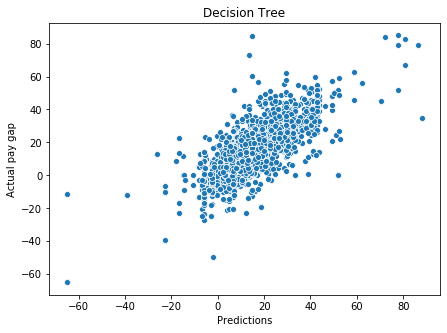

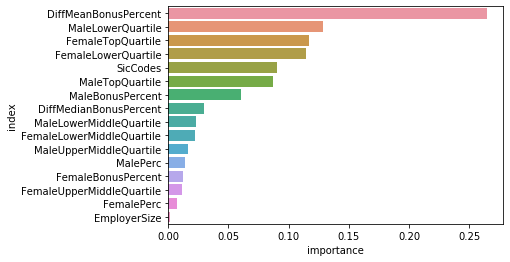

In [41]:
correlatePredictions(decision_tree_model,val_X,val_y,"Decision Tree")
feature_imp(decision_tree_model,train_X)

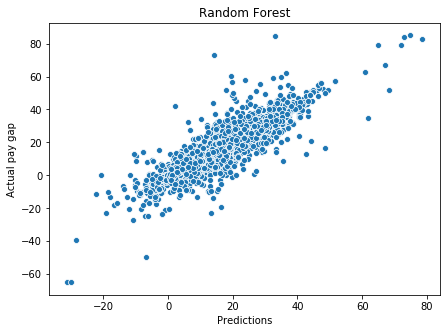

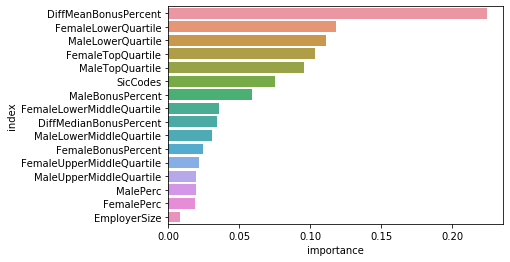

In [42]:
correlatePredictions(forest_model,val_X,val_y,"Random Forest")
feature_imp(forest_model,train_X)

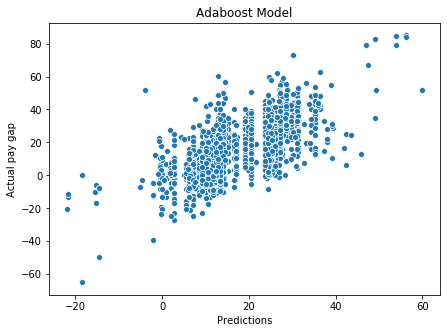

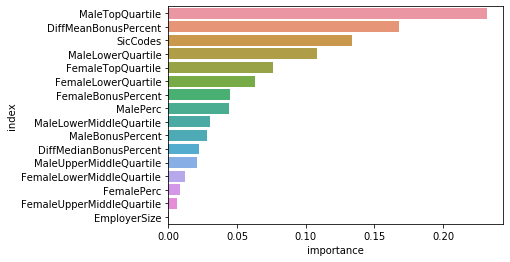

In [43]:
correlatePredictions(adaboost_model,val_X,val_y,"Adaboost Model")
feature_imp(adaboost_model,train_X)

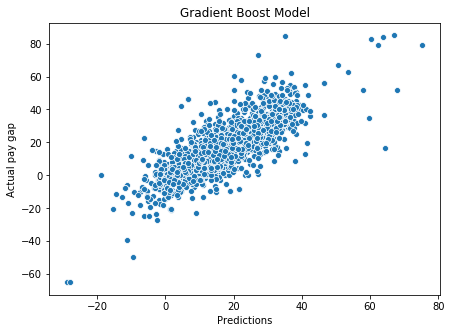

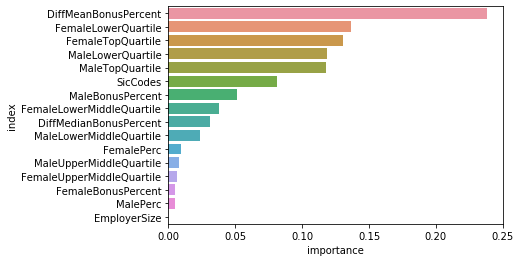

In [44]:
correlatePredictions(gradboost_model,val_X,val_y,"Gradient Boost Model")
feature_imp(gradboost_model,train_X)

In [52]:
#predict median hourly rate
#https://stats.stackexchange.com/questions/131267/how-to-interpret-error-measures
y = new_data.DiffMedianHourlyPercent
features = ['DiffMedianBonusPercent','DiffMeanBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes','FemalePerc','MalePerc']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
median_decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
median_forest_model = random_forest(train_X, val_X, train_y, val_y)
median_adaboost_model = adaboost(train_X, val_X, train_y, val_y)
median_gradboost_model = gradboost(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 6.9305106578219045
Decision tree root mean squared error: 9.907602418451894
Decision tree R^2 score:  0.5732172283499675
Random forest mae: 4.48111388508892
Random forest rmse: 7.261057400323553
Random forest R^2 score: 0.7707710429298915
Adaboost mae: 9.98695943936333
Adaboost rmse: 12.718980551312713
Adaboost R^2 score 0.29664537910679944
Gradient Boosting mae: 6.177726641861327
Gradient Boosting rmse: 8.778479362572696
Gradient Boosting R^2 score 0.6649510019627398


In [53]:
# from sklearn import tree
# import graphviz

# tree_graph = tree.export_graphviz(median_decision_tree_model, out_file=None, feature_names=features)
# graphviz.Source(tree_graph)

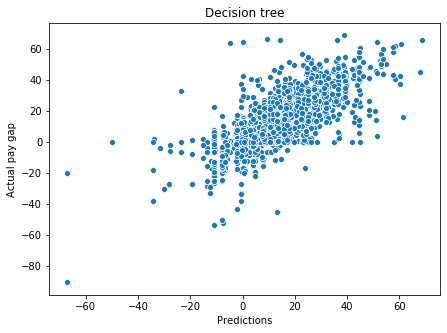

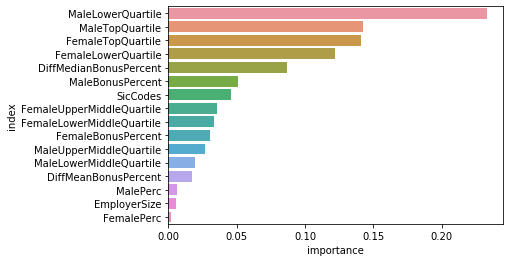

In [54]:
correlatePredictions(median_decision_tree_model,val_X,val_y,"Decision tree")
feature_imp(median_decision_tree_model,train_X)

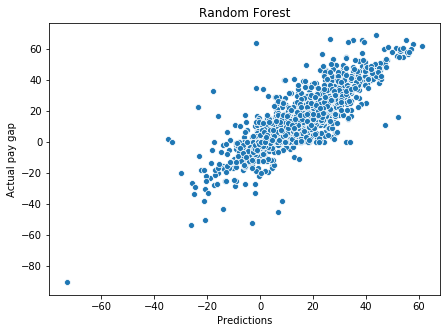

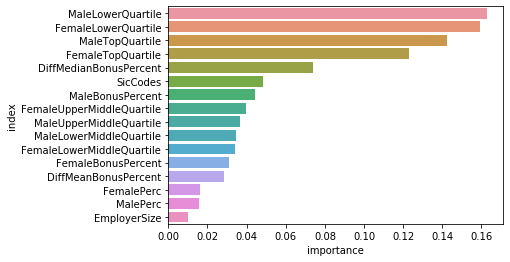

In [55]:
correlatePredictions(median_forest_model,val_X,val_y,"Random Forest")
feature_imp(median_forest_model,train_X)

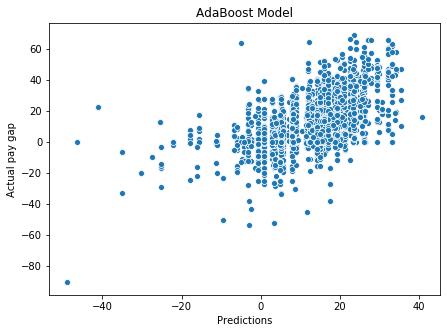

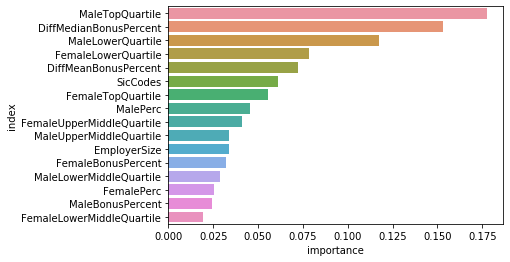

In [56]:
correlatePredictions(median_adaboost_model,val_X,val_y,"AdaBoost Model")
feature_imp(median_adaboost_model,train_X)

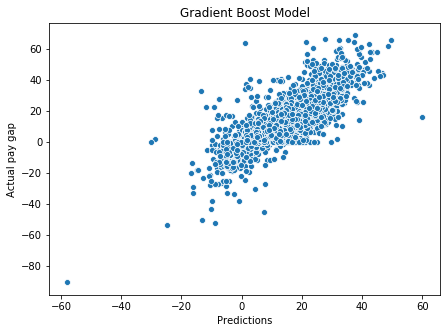

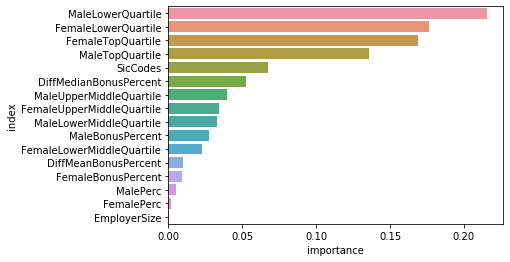

In [57]:
correlatePredictions(median_gradboost_model,val_X,val_y,"Gradient Boost Model")

feature_imp(median_gradboost_model,train_X)

In [58]:
trial_data = data.copy()

In [59]:
new_data.groupby('EmployerSize').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

EmployerSize
2    4903
3    2855
0    2794
4     722
5     316
1      95
6      10
Name: DiffMeanHourlyPercent, dtype: int64

In [60]:
new_data.groupby('SicCodes').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

SicCodes
1        1080
82990     497
70100     313
85310     286
84110     237
         ... 
52211       1
23140       1
23190       1
23200       1
60100       1
Name: DiffMeanHourlyPercent, Length: 603, dtype: int64

Imbalance in class...This needs work

## Permutation importance

https://www.kaggle.com/dansbecker/permutation-importance

In [63]:
import eli5
from eli5.sklearn import PermutationImportance

In [64]:
perm = PermutationImportance(median_forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.4372 ± 0.0260,MaleLowerQuartile
0.3774 ± 0.0153,FemaleLowerQuartile
0.3209 ± 0.0174,MaleTopQuartile
0.2310 ± 0.0093,FemaleTopQuartile
0.0840 ± 0.0190,DiffMedianBonusPercent
0.0513 ± 0.0064,FemaleUpperMiddleQuartile
0.0494 ± 0.0026,FemaleLowerMiddleQuartile
0.0456 ± 0.0074,MaleUpperMiddleQuartile
0.0442 ± 0.0017,MaleLowerMiddleQuartile
0.0422 ± 0.0069,MaleBonusPercent


In [65]:
perm = PermutationImportance(median_gradboost_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3525 ± 0.0223,MaleLowerQuartile
0.2404 ± 0.0109,FemaleLowerQuartile
0.2204 ± 0.0179,FemaleTopQuartile
0.1680 ± 0.0111,MaleTopQuartile
0.0674 ± 0.0051,MaleLowerMiddleQuartile
0.0559 ± 0.0039,MaleUpperMiddleQuartile
0.0521 ± 0.0056,FemaleUpperMiddleQuartile
0.0493 ± 0.0042,FemaleLowerMiddleQuartile
0.0471 ± 0.0054,SicCodes
0.0318 ± 0.0078,DiffMedianBonusPercent


## Partial dependence plot

In [68]:
from pdpbox import pdp, get_dataset, info_plots

In [69]:
def pdpFunction(model,data,features,feature_to_plot):
    pdp_score = pdp.pdp_isolate(model=model, dataset=data, model_features=features,
                                feature=feature_to_plot)
    pdp.pdp_plot(pdp_score, feature_to_plot)
    plt.show()

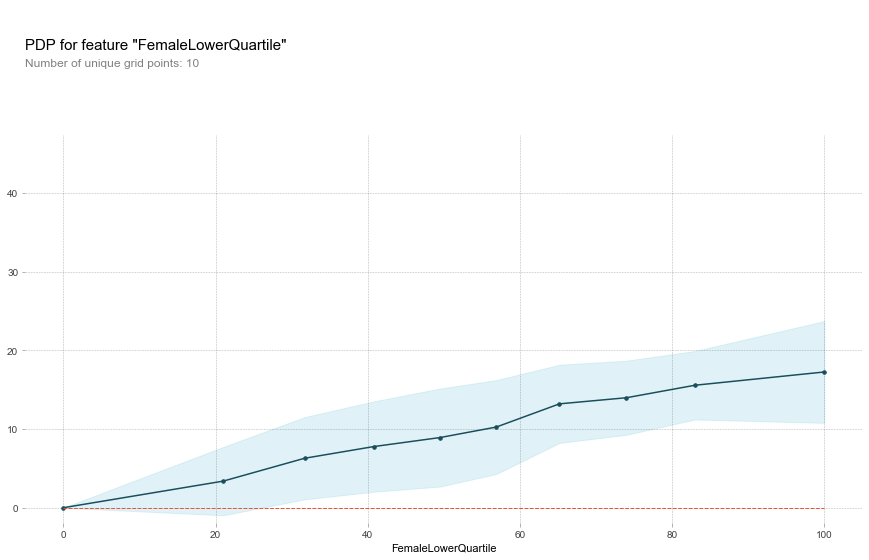

In [70]:
pdpFunction(median_forest_model,val_X,features,'FemaleLowerQuartile')

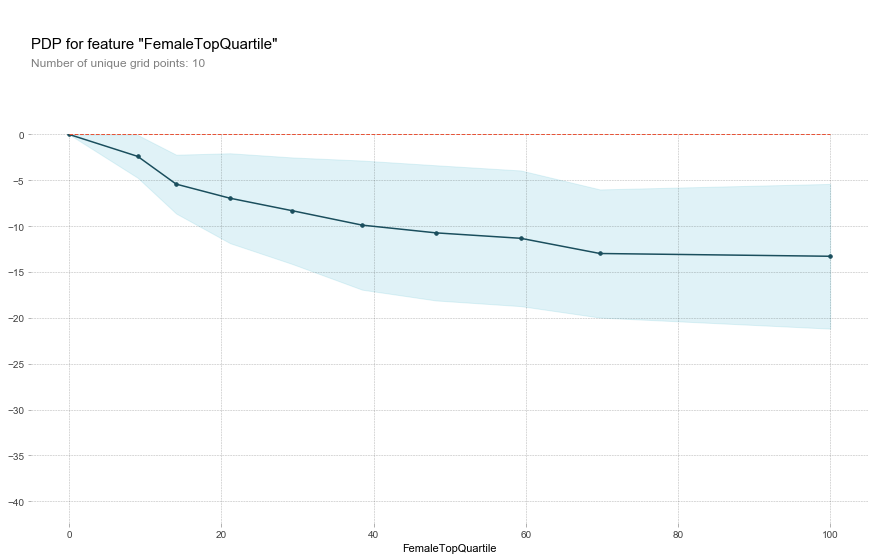

In [61]:
pdpFunction(median_forest_model,val_X,features,'FemaleTopQuartile')

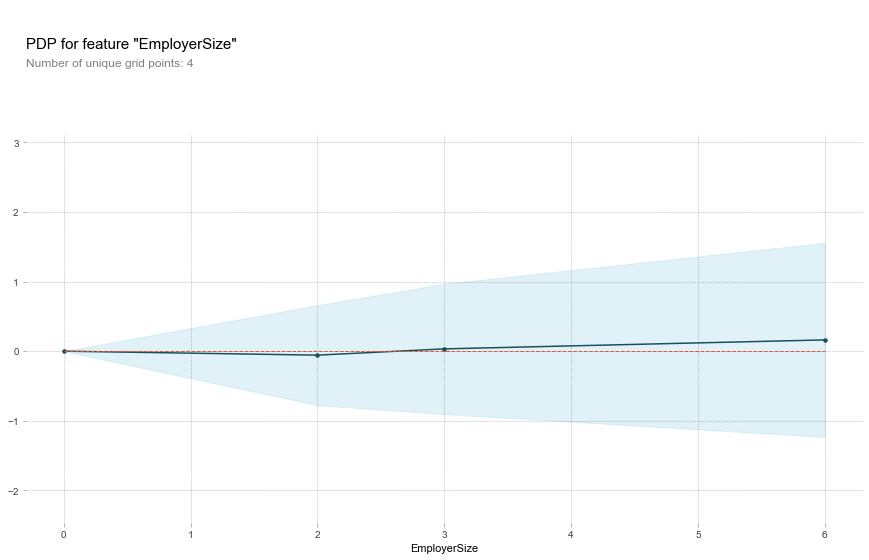

In [62]:
pdpFunction(median_forest_model,val_X,features,'EmployerSize')

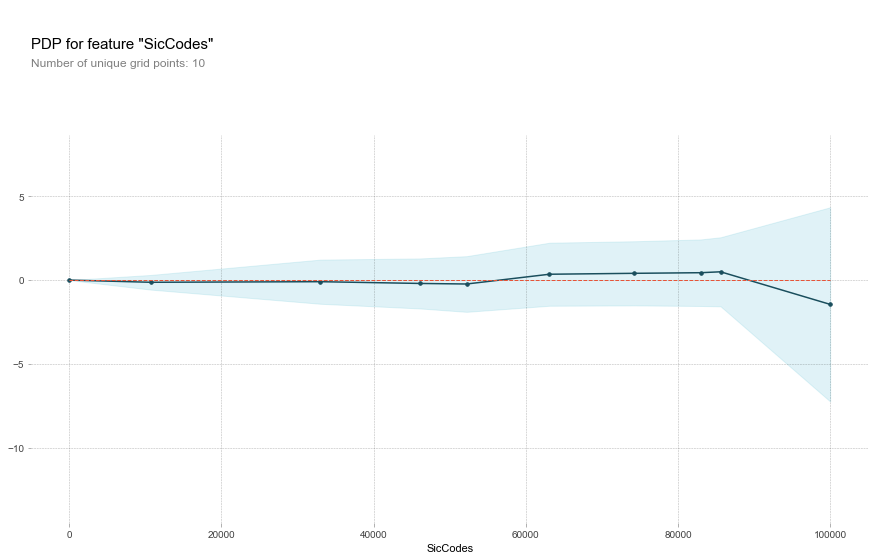

In [63]:
pdpFunction(median_forest_model,val_X,features,'SicCodes')

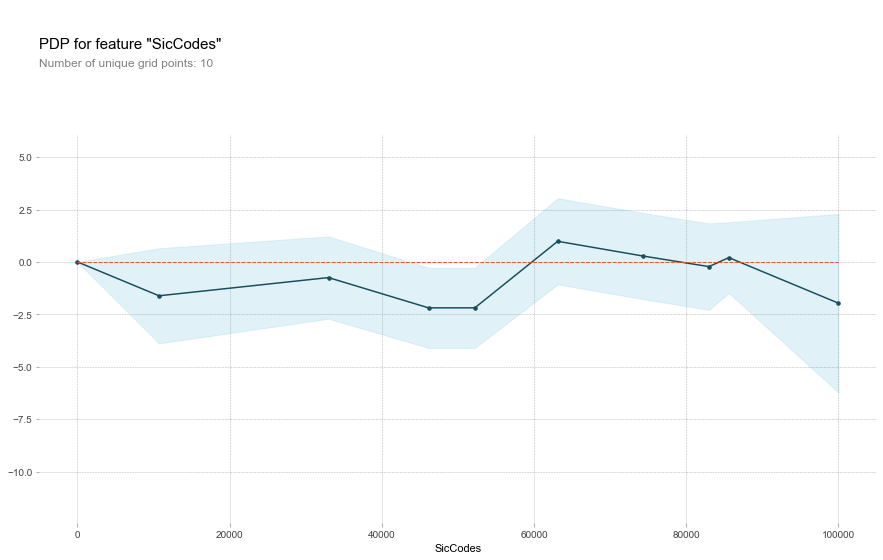

In [64]:
pdpFunction(median_gradboost_model,val_X,features,'SicCodes')

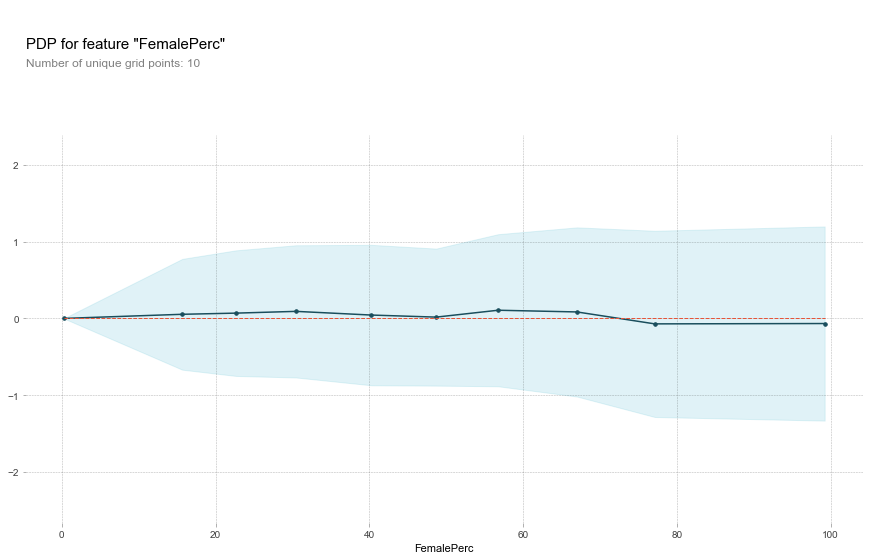

In [73]:
pdpFunction(median_forest_model,val_X,features,'FemalePerc')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


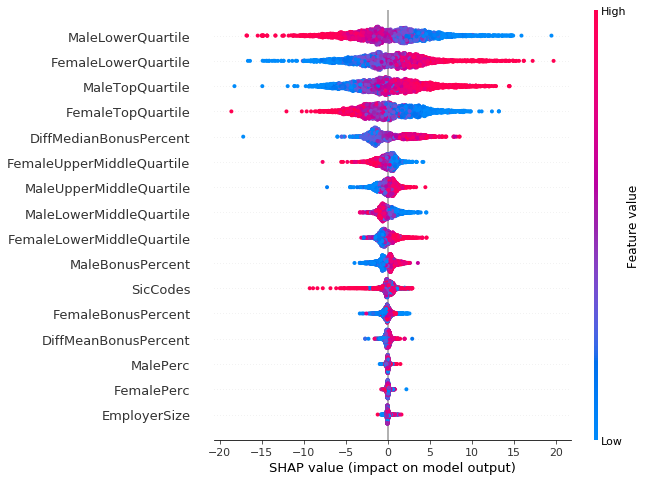

In [66]:
# https://github.com/slundberg/shap
# this takes time
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

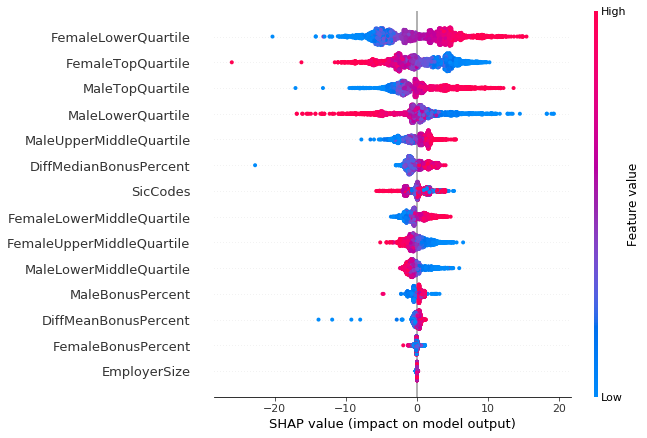

In [66]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_gradboost_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)